<a href="https://colab.research.google.com/github/mertqara/PopularGameGenres/blob/main/dataVisualisationAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub
url = "http://raw.githubusercontent.com/mertqara/PopularGameGenres/refs/heads/main/cleaned_merged_final_data.csv"
eda_df = pd.read_csv(url)

# Clean and prepare
eda_df['Release_Year'] = eda_df['Release_Year'].astype('Int64')
eda_df['MetaScore'] = pd.to_numeric(eda_df['MetaScore'], errors='coerce')
eda_df['UserReview'] = pd.to_numeric(eda_df['UserReview'], errors='coerce')

# Create AAA vs Indie label
aaa_publishers = ['Nintendo', 'Sony', 'Electronic Arts', 'Ubisoft', 'Activision',
                  'Microsoft Game Studios', 'Take-Two Interactive', 'Bethesda Softworks']
eda_df['Studio_Type'] = eda_df['Publisher'].apply(
    lambda x: 'AAA' if any(big in str(x) for big in aaa_publishers) else 'Indie'
)

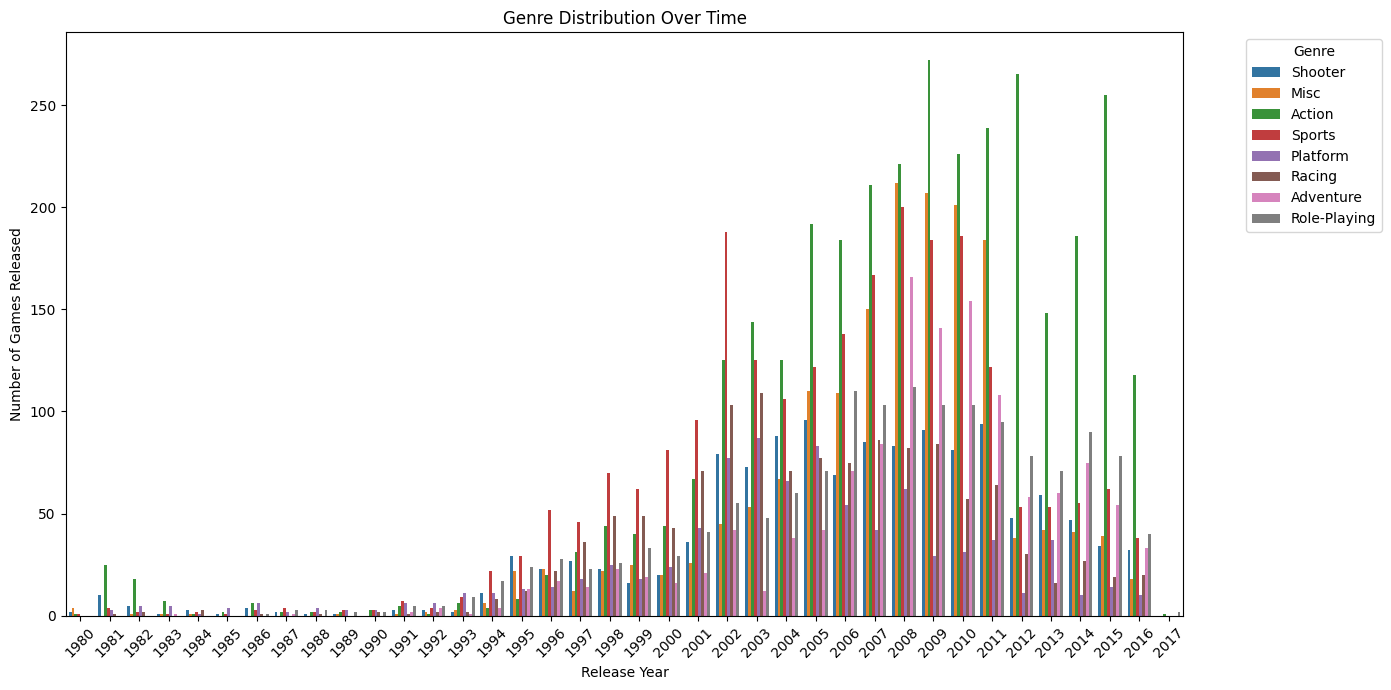

In [7]:
# ✅ 2.1 Genre Distribution Over Time
genre_over_time = eda_df.dropna(subset=['Genre', 'Release_Year'])
genre_over_time['Genre'] = genre_over_time['Genre'].str.strip()

# Plot genre trend
plt.figure(figsize=(14, 7))
top_genres = genre_over_time['Genre'].value_counts().nlargest(8).index
genre_trend = genre_over_time[genre_over_time['Genre'].isin(top_genres)]

sns.countplot(data=genre_trend, x='Release_Year', hue='Genre')
plt.title('Genre Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

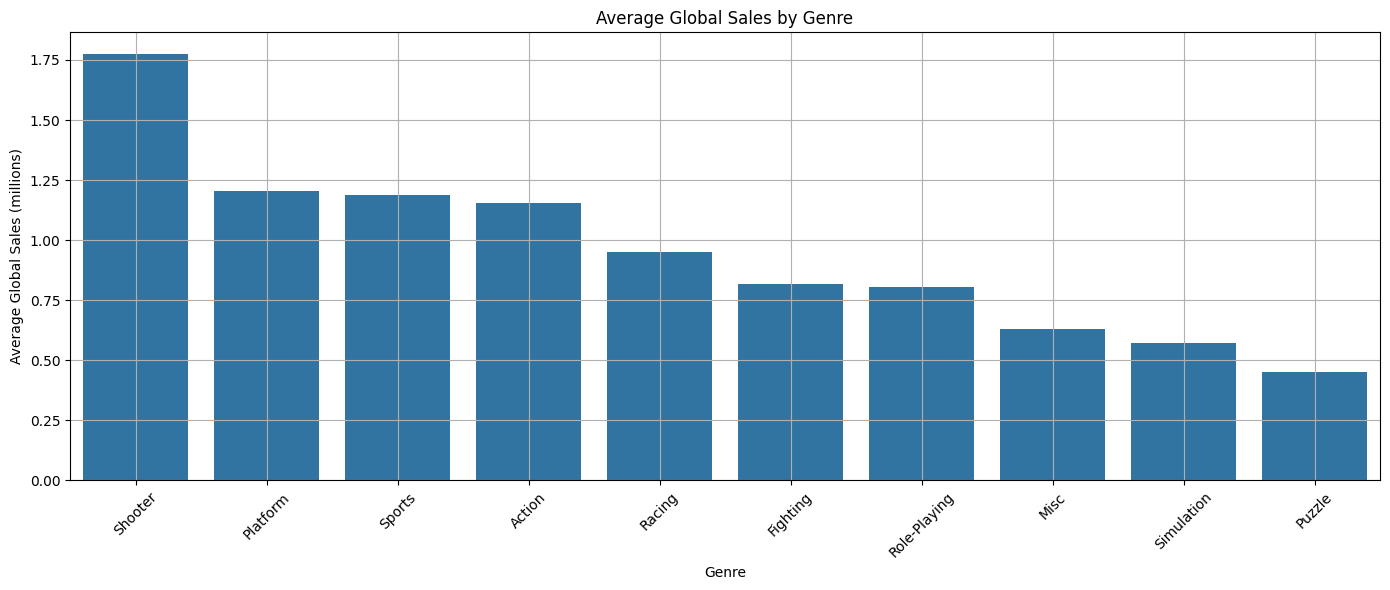

In [4]:
# 2.2 Sales Trends by Genre (Average Global Sales)
plt.figure(figsize=(14, 6))
genre_sales = eda_df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Average Global Sales by Genre')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

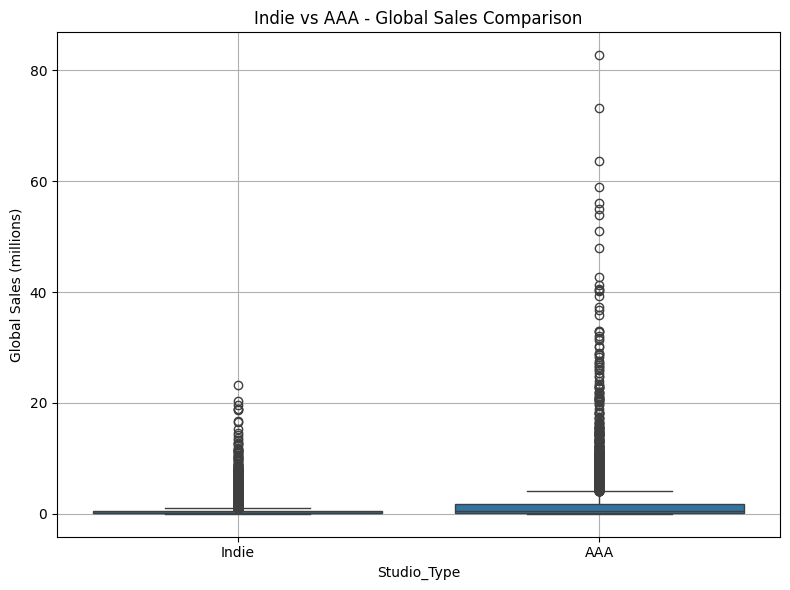

In [5]:
# 2.3 Indie vs AAA Impact on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df, x='Studio_Type', y='Global_Sales')
plt.title('Indie vs AAA - Global Sales Comparison')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

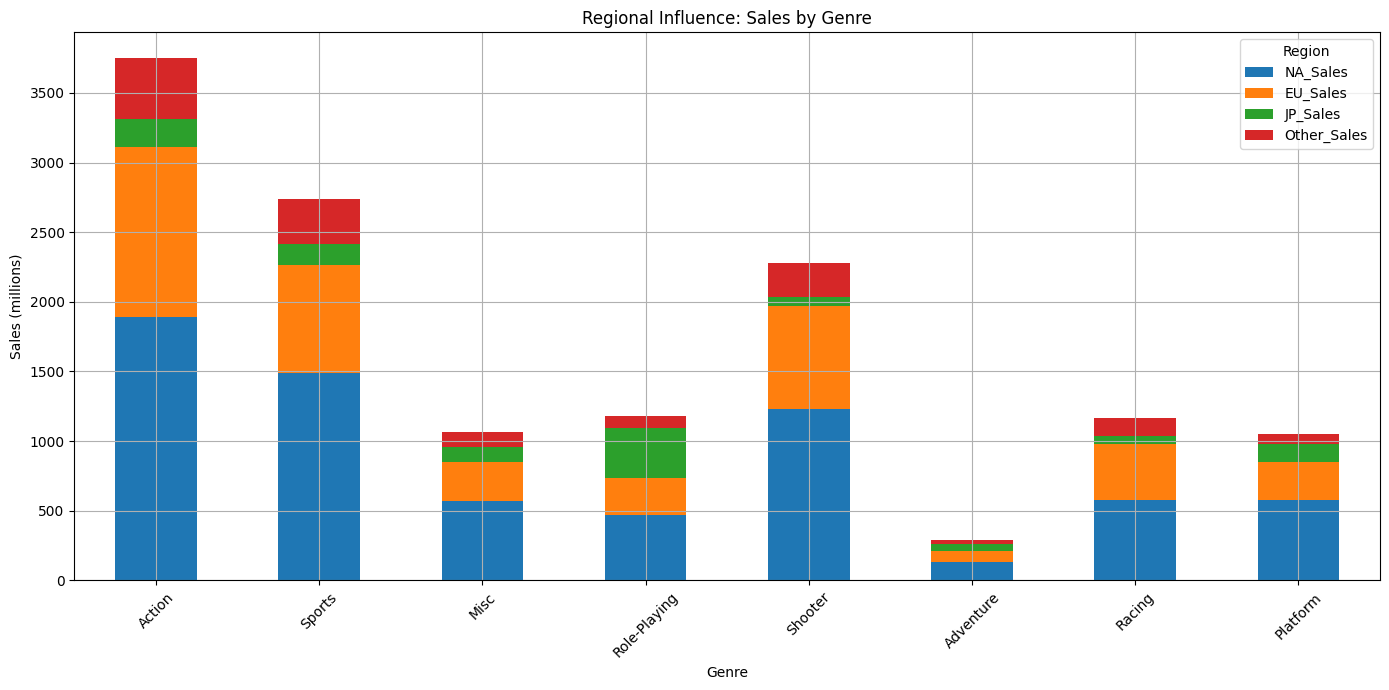

In [6]:
# 2.4 Regional Influence (Favorite Genre by Region)
region_sales = eda_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.loc[top_genres]

region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Regional Influence: Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-12-b05da532f6af>:15: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


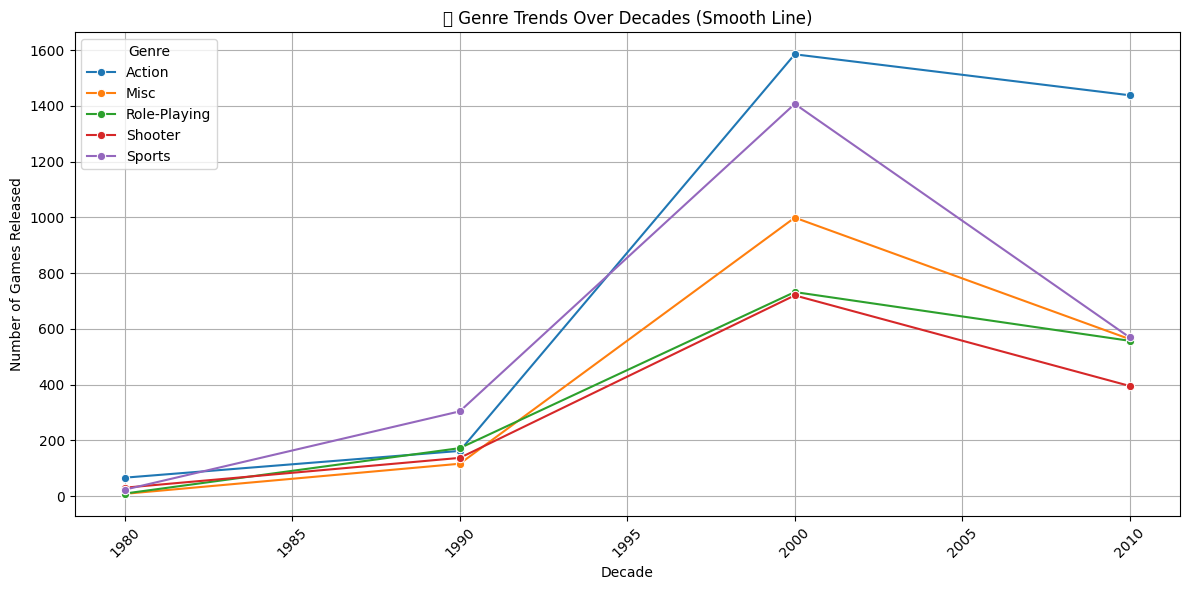

In [12]:
# Correlation Analysis ---

# 3.1 Genre vs Release Year: Genre Evolution Over Time

# Group and count number of games by Decade and Genre
genre_decade = genre_trend_clean.groupby(['Decade', 'Genre']).size().reset_index(name='Game_Count')

# Plot Smooth Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_decade, x='Decade', y='Game_Count', hue='Genre', marker='o')
plt.title('Genre Trends Over Decades (Smooth Line)')
plt.xlabel('Decade')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

<ipython-input-13-33408b00c505>:14: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


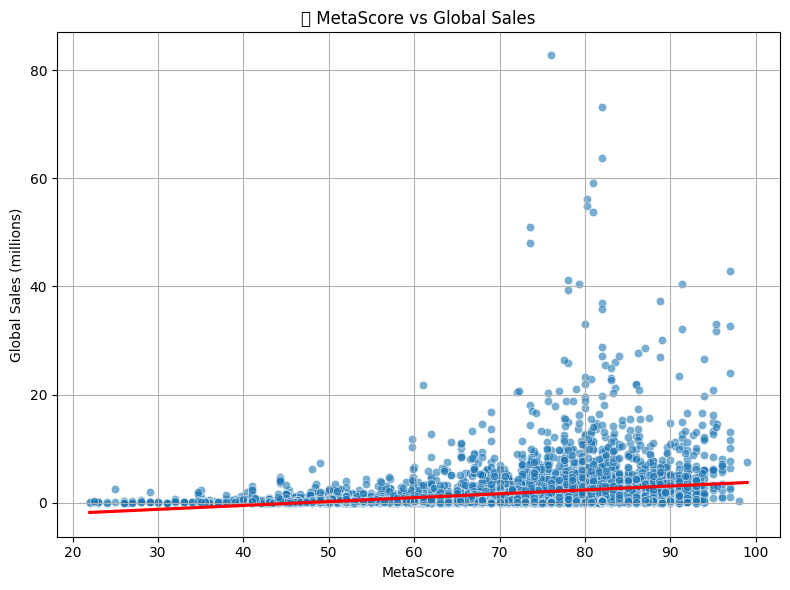

<ipython-input-13-33408b00c505>:25: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


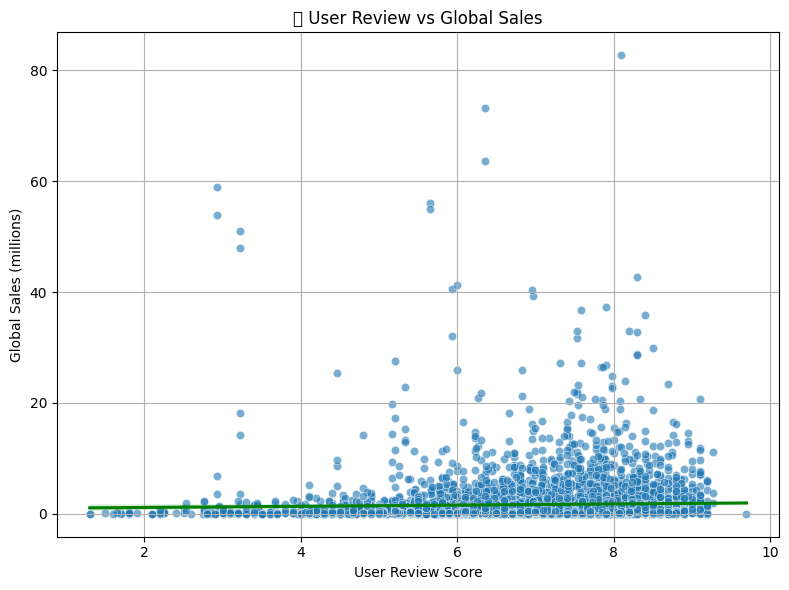

Correlation between MetaScore and Global Sales: 0.24
Correlation between User Review and Global Sales: 0.03


In [13]:
# 3.2 Game Ratings vs Global Sales

# Drop missing scores
rating_sales_df = eda_df.dropna(subset=['MetaScore', 'UserReview', 'Global_Sales'])

# Scatter: MetaScore vs Global Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_sales_df, x='MetaScore', y='Global_Sales', alpha=0.6)
sns.regplot(data=rating_sales_df, x='MetaScore', y='Global_Sales', scatter=False, color='red')
plt.title('MetaScore vs Global Sales')
plt.xlabel('MetaScore')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter: UserReview vs Global Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_sales_df, x='UserReview', y='Global_Sales', alpha=0.6)
sns.regplot(data=rating_sales_df, x='UserReview', y='Global_Sales', scatter=False, color='green')
plt.title('User Review vs Global Sales')
plt.xlabel('User Review Score')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation calculation
correlation_metascore = rating_sales_df['MetaScore'].corr(rating_sales_df['Global_Sales'])
correlation_userreview = rating_sales_df['UserReview'].corr(rating_sales_df['Global_Sales'])

print(f"Correlation between MetaScore and Global Sales: {correlation_metascore:.2f}")
print(f"Correlation between User Review and Global Sales: {correlation_userreview:.2f}")

<ipython-input-14-6a3bc397d984>:9: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


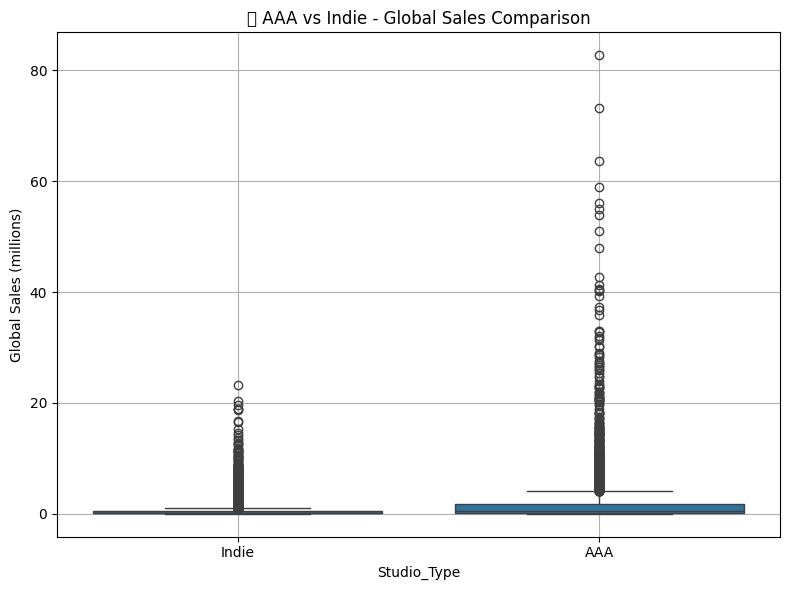

<ipython-input-14-6a3bc397d984>:18: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


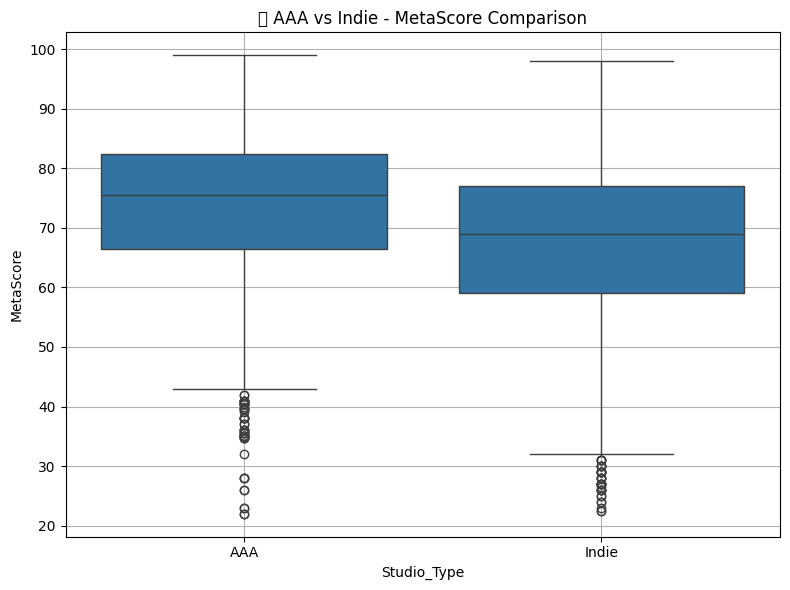

<ipython-input-14-6a3bc397d984>:27: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


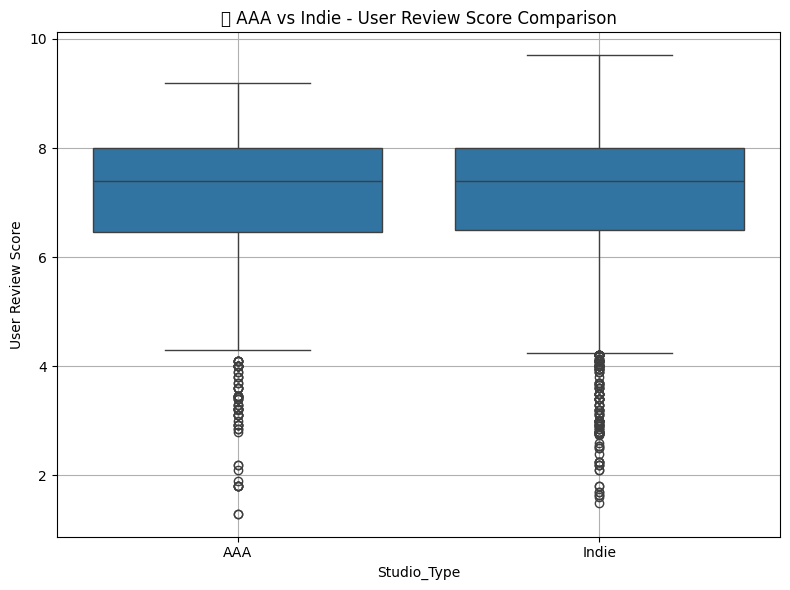

In [14]:
# 3.3 AAA vs Indie Studio Influence on Sales and Scores

# Boxplot: Global Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df, x='Studio_Type', y='Global_Sales')
plt.title('AAA vs Indie - Global Sales Comparison')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: MetaScore
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df.dropna(subset=['MetaScore']), x='Studio_Type', y='MetaScore')
plt.title('AAA vs Indie - MetaScore Comparison')
plt.ylabel('MetaScore')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: UserReview
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df.dropna(subset=['UserReview']), x='Studio_Type', y='UserReview')
plt.title('AAA vs Indie - User Review Score Comparison')
plt.ylabel('User Review Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Hypothesis Test 1: AAA vs Indie - Global Sales
aaa_sales = df[df['Studio_Type'] == 'AAA']['Global_Sales'].dropna()
indie_sales = df[df['Studio_Type'] == 'Indie']['Global_Sales'].dropna()

tstat1, pvalue1 = stats.ttest_ind(aaa_sales, indie_sales, equal_var=False)

print("=== Hypothesis Testing Results ===")
print(f"1️ AAA vs Indie Global Sales:")
print(f"   t-statistic = {tstat1:.3f}, p-value = {pvalue1:.5f}")
print("   ➡️ Significant difference" if pvalue1 < 0.05 else "   ➡️ No significant difference")
print()


=== Hypothesis Testing Results ===
1️⃣ AAA vs Indie Global Sales:
   t-statistic = 22.072, p-value = 0.00000
   ➡️ Significant difference



In [21]:
# Hypothesis Test 2: High vs Low MetaScore - Global Sales
high_meta = df[df['MetaScore'] > 80]['Global_Sales'].dropna()
low_meta = df[df['MetaScore'] <= 80]['Global_Sales'].dropna()

tstat2, pvalue2 = stats.ttest_ind(high_meta, low_meta, equal_var=False)

print(f"2️ High vs Low MetaScore Global Sales:")
print(f"   t-statistic = {tstat2:.3f}, p-value = {pvalue2:.5f}")
print("   ➡️ Significant difference" if pvalue2 < 0.05 else "   ➡️ No significant difference")
print()

2️⃣ High vs Low MetaScore Global Sales:
   t-statistic = 13.743, p-value = 0.00000
   ➡️ Significant difference



In [22]:
# ✅ Hypothesis Test 3: Japan Sales vs Global Sales
# (Filtering out 0 sales to avoid noise)
japan_sales = df[df['JP_Sales'] > 0]['JP_Sales']
global_sales = df[df['Global_Sales'] > 0]['Global_Sales']

tstat3, pvalue3 = stats.ttest_ind(japan_sales, global_sales, equal_var=False)

print(f"3️ Japan Sales vs Global Sales:")
print(f"   t-statistic = {tstat3:.3f}, p-value = {pvalue3:.5f}")
print("   ➡️ Significant difference" if pvalue3 < 0.05 else "   ➡️ No significant difference")
print()

3️⃣ Japan Sales vs Global Sales:
   t-statistic = -31.217, p-value = 0.00000
   ➡️ Significant difference

